CROSS-SELL PREDICTION MODEL

In [262]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets, metrics, model_selection, svm
import category_encoders as ce
from sklearn.svm import SVC
import xgboost as xgb

In [68]:
customer_data = pd.read_csv("data_train.csv")
customer_data.sample(5)

,SLG_CUOC_GOC_GPRS_10MONTHS,AVG_CUOC_GOC_GPRS_10MONTHS,HA_TANG_220601,IS_DCOM_220601,IS_SIM_4G_220601,LL_THOAI_210901,LL_THOAI_211001,LL_THOAI_211101,LL_THOAI_211201,LL_THOAI_220101,...,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601,user_id
67986,0,0.0,2G,0,1,4081.0,2151.0,2125.0,1667.0,3101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 < X <= 25,3.070000e+11
27646,0,0.0,4G,0,1,93.0,165.0,8.0,273.0,324.0,...,0.0,0.0,10000.0,120000.0,0.0,0.0,0.0,0.0,15 < X <= 25,2.120000e+11
187204,0,0.0,4G,0,1,417.0,1161.0,1625.0,1829.0,675.0,...,50000.0,0.0,0.0,50000.0,0.0,50000.0,50000.0,0.0,35 < X <= 45,4.140000e+11
101496,0,0.0,2G,0,1,2919.0,2938.0,4362.0,1316.0,6281.0,...,50000.0,50000.0,0.0,0.0,0.0,10000.0,20000.0,140000.0,35 < X <= 45,1.860000e+11
44229,0,0.0,4G,0,1,148.0,95.0,120.0,266.0,260.0,...,30000.0,0.0,0.0,0.0,20000.0,30000.0,0.0,50000.0,15 < X <= 25,5.640000e+11


EDA CƠ SỞ DỮ LIỆU

In [69]:
customer_data.info() # Get information about data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 101 entries, SLG_CUOC_GOC_GPRS_10MONTHS to user_id
dtypes: float64(89), int64(9), object(3)
memory usage: 154.1+ MB


In [70]:
print(customer_data.describe())  # Summary statistics of numerical columns

       SLG_CUOC_GOC_GPRS_10MONTHS  AVG_CUOC_GOC_GPRS_10MONTHS  IS_DCOM_220601   
count               200000.000000                2.000000e+05   200000.000000  \
mean                     0.049010                1.989802e+02        0.014925   
std                      0.544407                6.585780e+03        0.192750   
min                      0.000000                0.000000e+00       -1.000000   
25%                      0.000000                0.000000e+00        0.000000   
50%                      0.000000                0.000000e+00        0.000000   
75%                      0.000000                0.000000e+00        0.000000   
max                     10.000000                2.131197e+06        5.000000   

       IS_SIM_4G_220601  LL_THOAI_210901  LL_THOAI_211001  LL_THOAI_211101   
count     200000.000000    199863.000000    199876.000000    199901.000000  \
mean           0.936740      2755.261864      2920.980048      2898.352565   
std            0.243431      8921.11

In [71]:
customer_data.isnull().sum()

SLG_CUOC_GOC_GPRS_10MONTHS           0
AVG_CUOC_GOC_GPRS_10MONTHS           0
HA_TANG_220601                       0
IS_DCOM_220601                       0
IS_SIM_4G_220601                     0
                                    ..
TONG_TIEN_NAP_TOPUP_220401          24
TONG_TIEN_NAP_TOPUP_220501          11
TONG_TIEN_NAP_TOPUP_220601           0
TUOI_KHACH_HANG_cut_level_220601    94
user_id                              0
Length: 101, dtype: int64

In [72]:
customer_data.drop(columns=["user_id"], inplace=True)

In [73]:
customer_data.dtypes

SLG_CUOC_GOC_GPRS_10MONTHS            int64
AVG_CUOC_GOC_GPRS_10MONTHS          float64
HA_TANG_220601                       object
IS_DCOM_220601                        int64
IS_SIM_4G_220601                      int64
                                     ...   
TONG_TIEN_NAP_TOPUP_220301          float64
TONG_TIEN_NAP_TOPUP_220401          float64
TONG_TIEN_NAP_TOPUP_220501          float64
TONG_TIEN_NAP_TOPUP_220601          float64
TUOI_KHACH_HANG_cut_level_220601     object
Length: 100, dtype: object

In [74]:
def print_unique_col_values(customer_data):
    for column in customer_data:
        if customer_data[column].dtypes =='object':
            print(f'{column}: {customer_data[column].unique()}')

In [75]:
print(set(customer_data['TUOI_KHACH_HANG_cut_level_220601']))

{'45 < X <= 55', '55 < X <= 65', nan, '75 < X', '25 < X <= 35', '0 < X <= 15', '35 < X <= 45', 'X <= 0', '15 < X <= 25', '65 < X <= 75'}


In [76]:
print_unique_col_values(customer_data)

HA_TANG_220601: ['G' '2G' '4G' '3G']
THIET_BI_220601: ['Unknown' '2G' '4G' '3G' '5G']
TUOI_KHACH_HANG_cut_level_220601: ['55 < X <= 65' '45 < X <= 55' '0 < X <= 15' '25 < X <= 35' '35 < X <= 45'
 '65 < X <= 75' '75 < X' '15 < X <= 25' nan 'X <= 0']


In [77]:
customer_data=customer_data.dropna(how='all')
customer_data.head()

,SLG_CUOC_GOC_GPRS_10MONTHS,AVG_CUOC_GOC_GPRS_10MONTHS,HA_TANG_220601,IS_DCOM_220601,IS_SIM_4G_220601,LL_THOAI_210901,LL_THOAI_211001,LL_THOAI_211101,LL_THOAI_211201,LL_THOAI_220101,...,TONG_TIEN_NAP_TOPUP_211001,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601
0,0,0.0,G,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 < X <= 65
1,0,0.0,G,-1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55
2,0,0.0,2G,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 < X <= 15
3,0,0.0,4G,0,1,1254.0,299.0,652.0,0.0,58.0,...,0.0,0.0,0.0,200000.0,0.0,260000.0,0.0,150000.0,10000.0,0 < X <= 15
4,1,570.0,2G,4,0,0.0,0.0,0.0,0.0,0.0,...,0.0,100000.0,0.0,0.0,100000.0,0.0,0.0,0.0,100000.0,25 < X <= 35


In [78]:
object_cols = [f for f in customer_data.columns if customer_data[f].dtype =="O"]
print(object_cols)

['HA_TANG_220601', 'THIET_BI_220601', 'TUOI_KHACH_HANG_cut_level_220601']


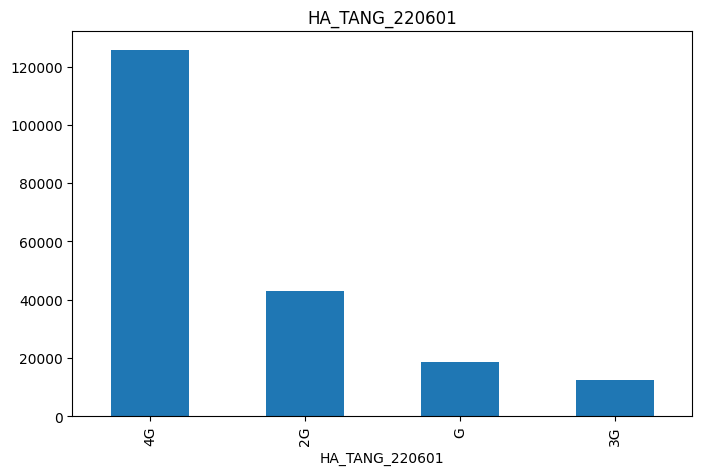

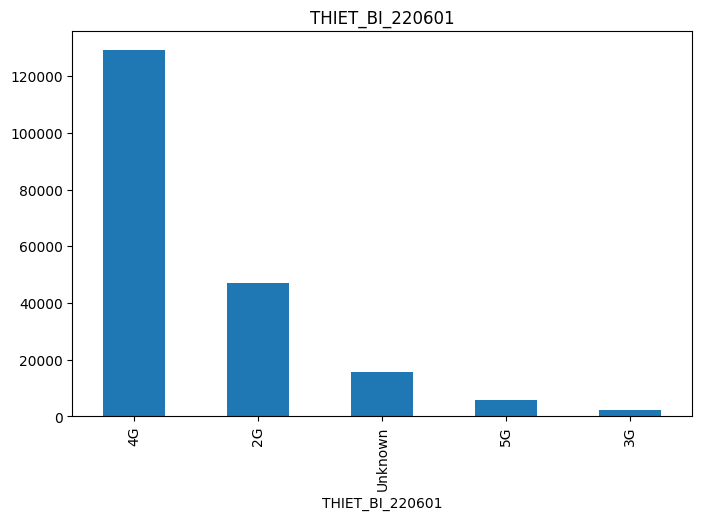

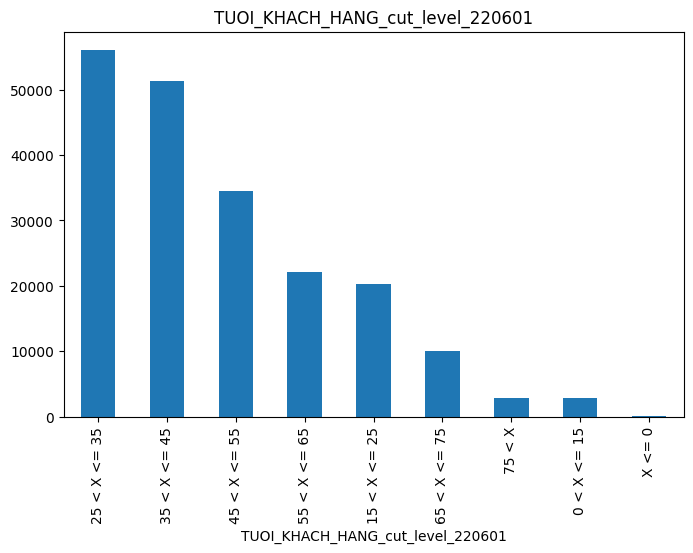

In [79]:
for col in object_cols:
  customer_data[col].value_counts().plot(kind='bar', figsize=(8,5))
  plt.title(col)
  plt.show()

In [80]:
numeric_cols = [f for f in customer_data.columns if customer_data[f].dtype !="O"]
print(numeric_cols)

['SLG_CUOC_GOC_GPRS_10MONTHS', 'AVG_CUOC_GOC_GPRS_10MONTHS', 'IS_DCOM_220601', 'IS_SIM_4G_220601', 'LL_THOAI_210901', 'LL_THOAI_211001', 'LL_THOAI_211101', 'LL_THOAI_211201', 'LL_THOAI_220101', 'LL_THOAI_220201', 'LL_THOAI_220301', 'LL_THOAI_220401', 'LL_THOAI_220501', 'LL_THOAI_220601', 'SLG_NOD_PSLL_THOAI_20MONTHS', 'SO_LAN_NAP_THE_210901', 'SO_LAN_NAP_THE_211001', 'SO_LAN_NAP_THE_211101', 'SO_LAN_NAP_THE_211201', 'SO_LAN_NAP_THE_220101', 'SO_LAN_NAP_THE_220201', 'SO_LAN_NAP_THE_220301', 'SO_LAN_NAP_THE_220401', 'SO_LAN_NAP_THE_220501', 'SO_LAN_NAP_THE_220601', 'SO_LAN_NAP_TOPUP_210901', 'SO_LAN_NAP_TOPUP_211001', 'SO_LAN_NAP_TOPUP_211101', 'SO_LAN_NAP_TOPUP_211201', 'SO_LAN_NAP_TOPUP_220101', 'SO_LAN_NAP_TOPUP_220201', 'SO_LAN_NAP_TOPUP_220301', 'SO_LAN_NAP_TOPUP_220401', 'SO_LAN_NAP_TOPUP_220501', 'SO_LAN_NAP_TOPUP_220601', 'AVG_SO_NGAY_SU_DUNG_10MONTHS', 'thuc_4g_220601', 'TONG_CUOC_GOC_DATA_4_HUONG_210901', 'TONG_CUOC_GOC_DATA_4_HUONG_211001', 'TONG_CUOC_GOC_DATA_4_HUONG_211101',

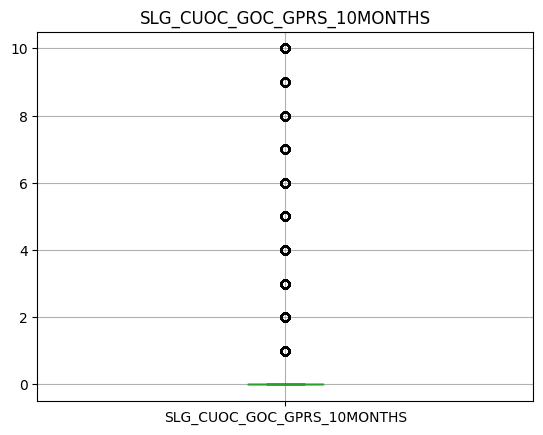

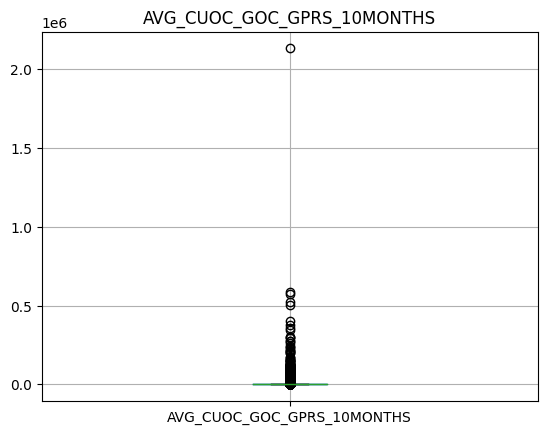

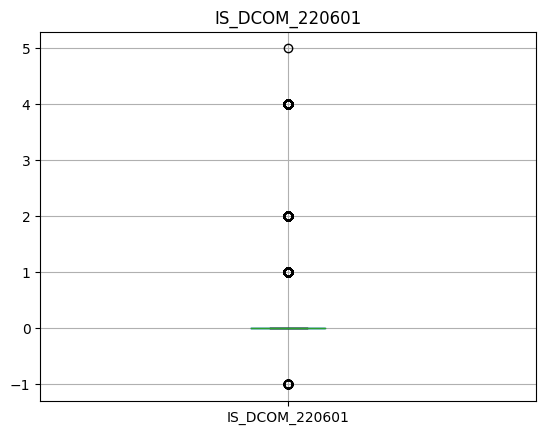

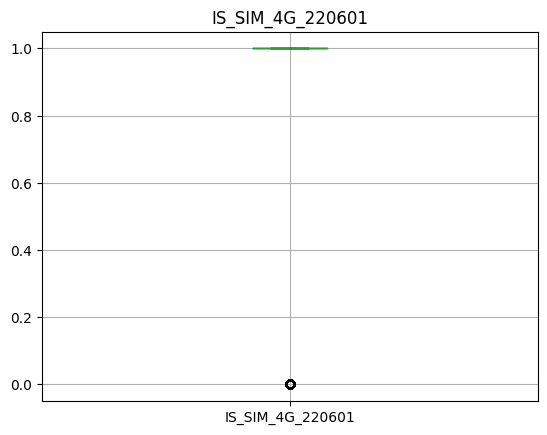

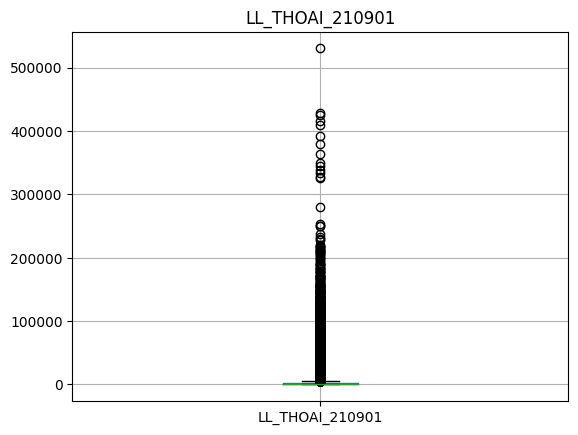

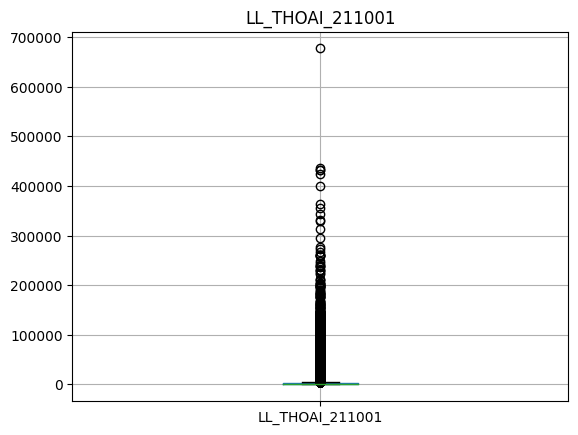

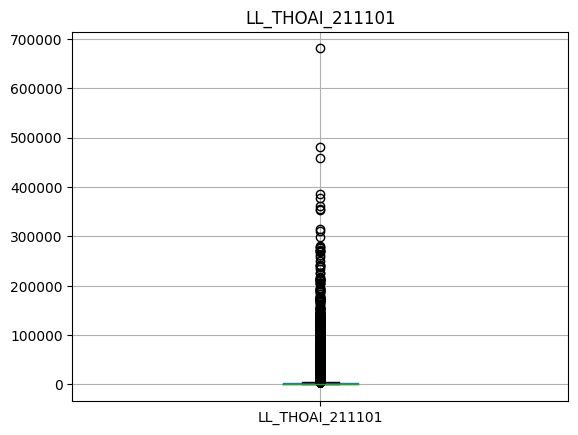

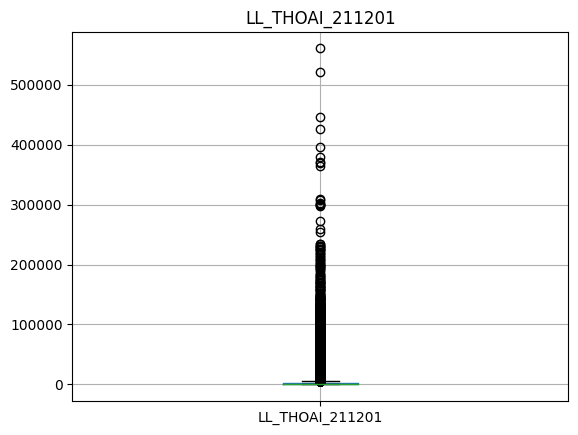

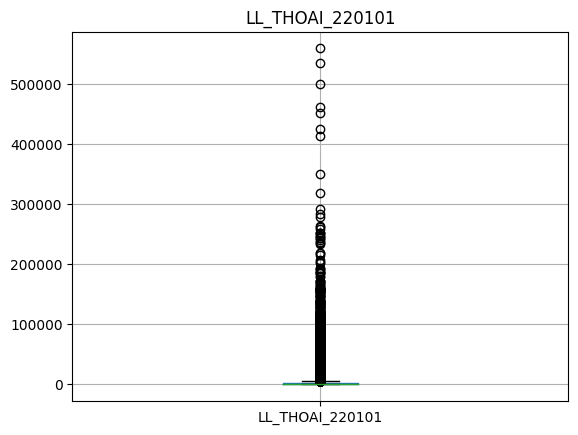

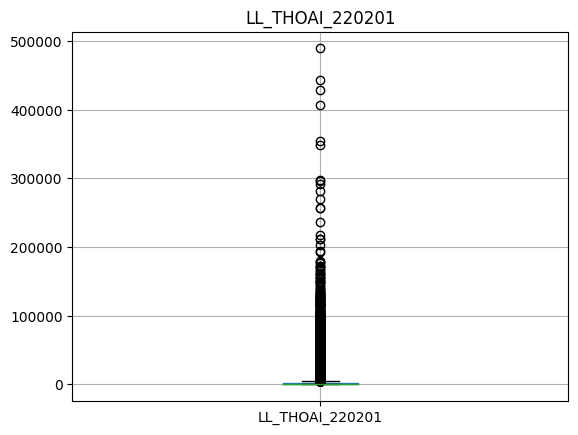

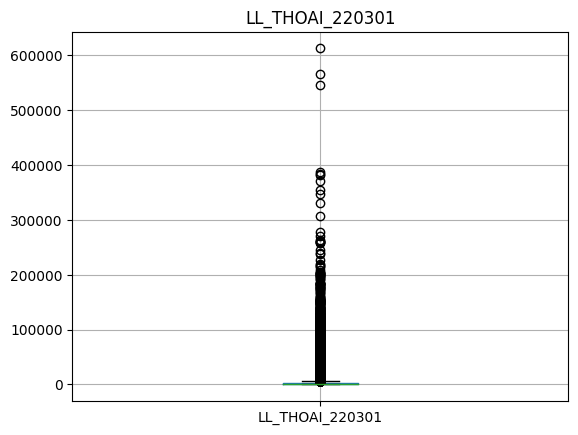

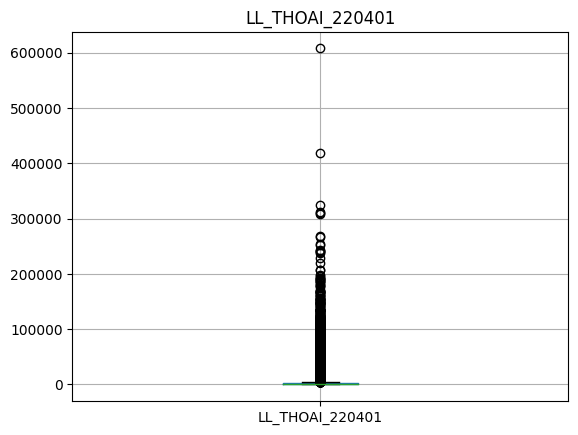

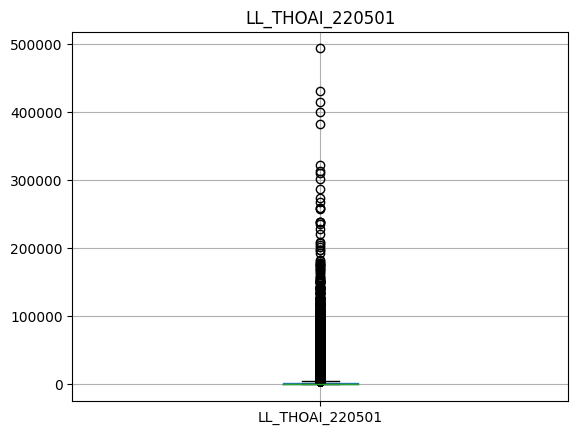

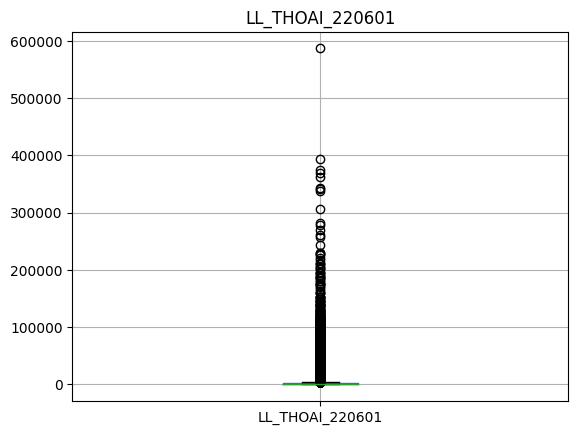

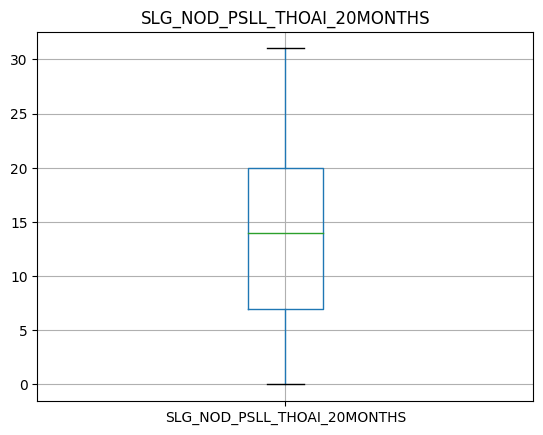

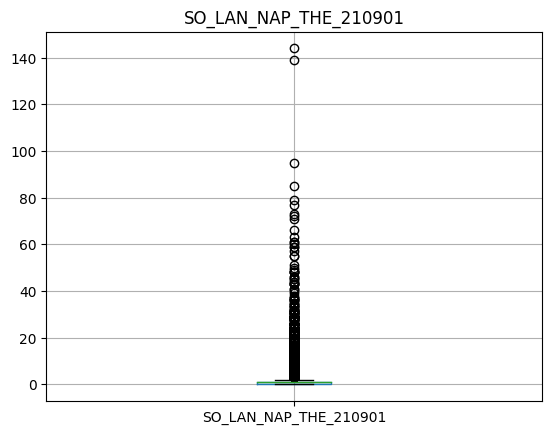

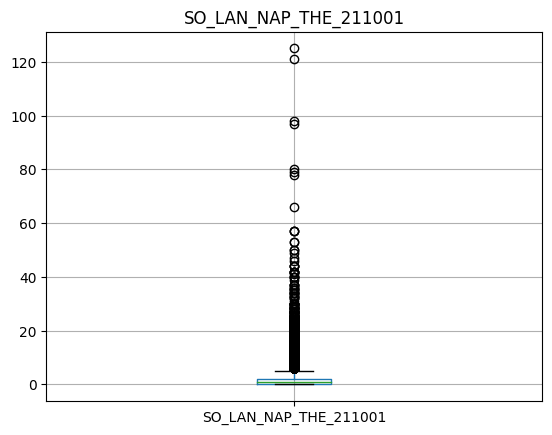

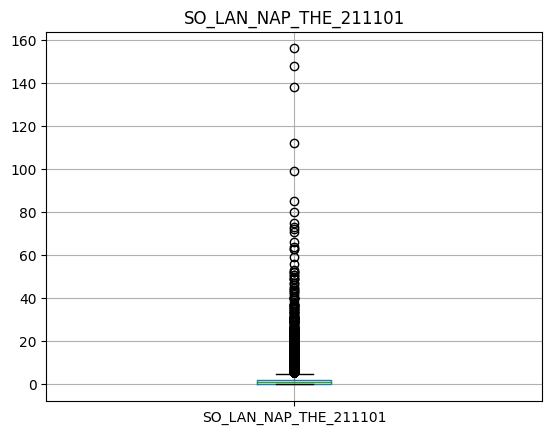

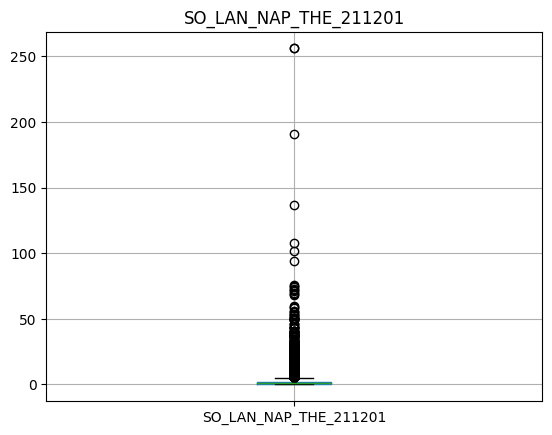

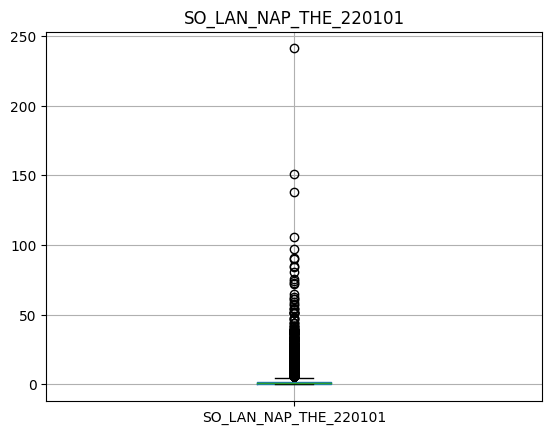

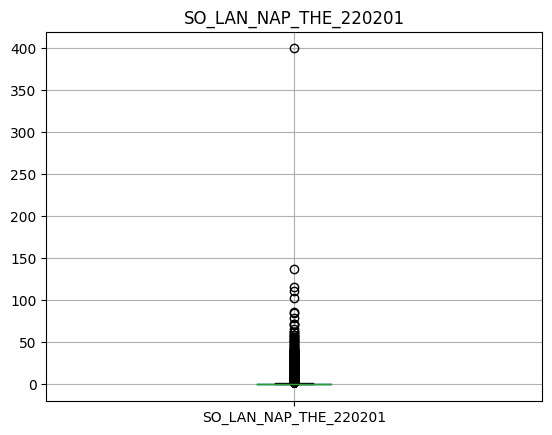

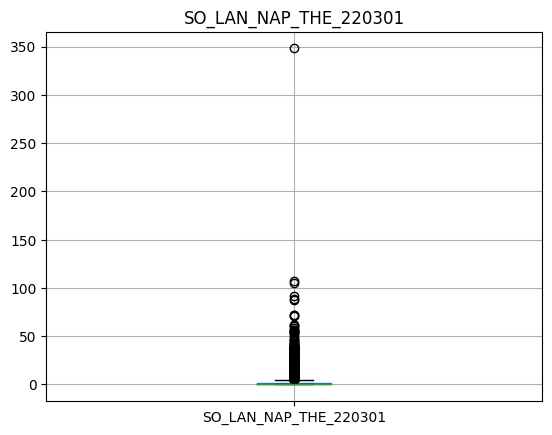

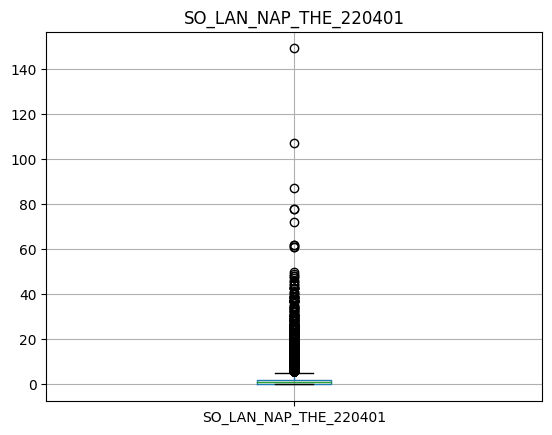

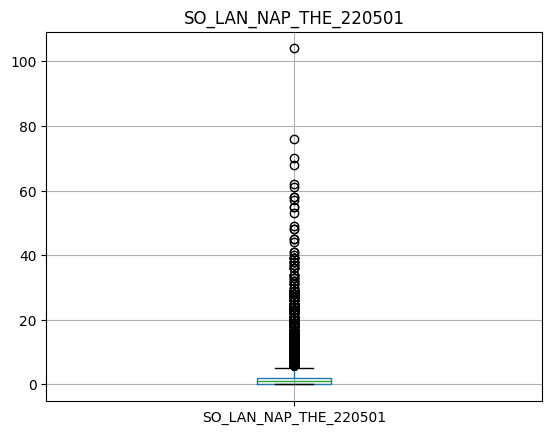

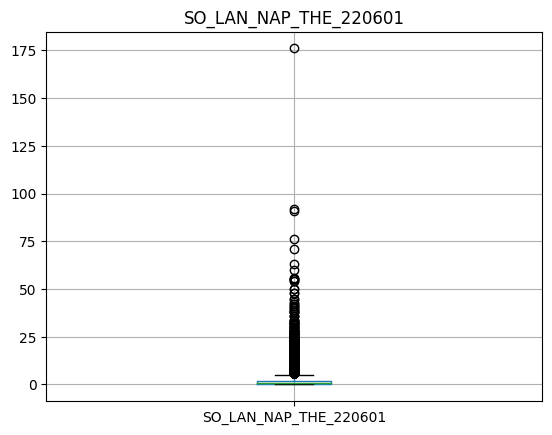

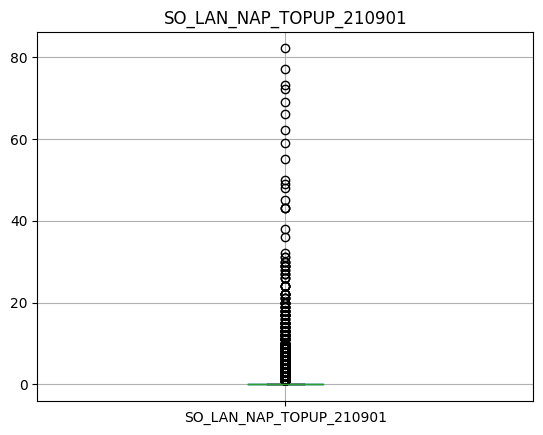

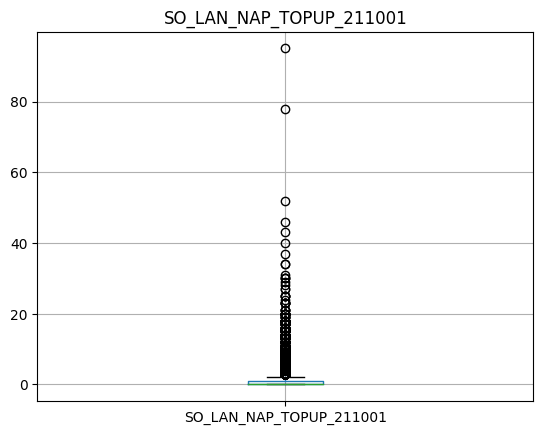

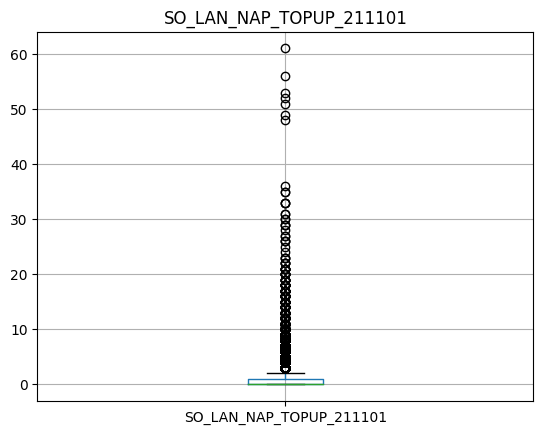

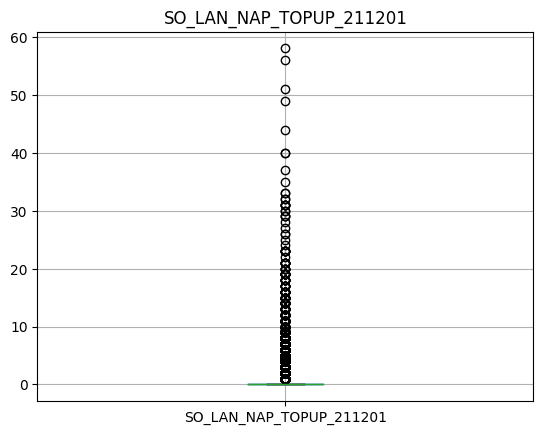

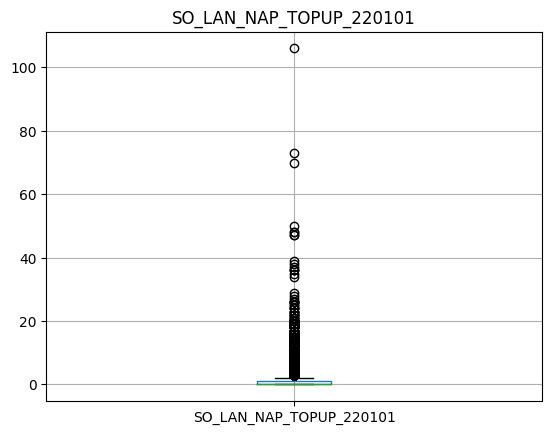

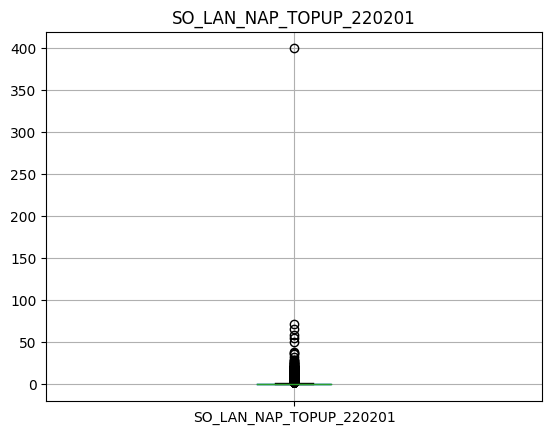

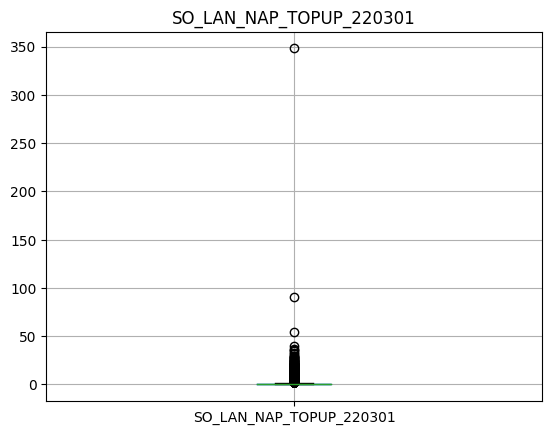

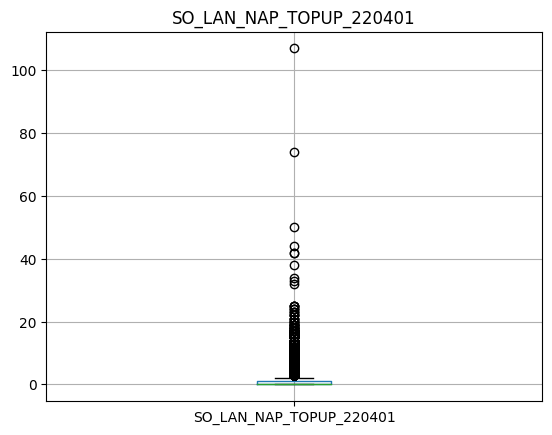

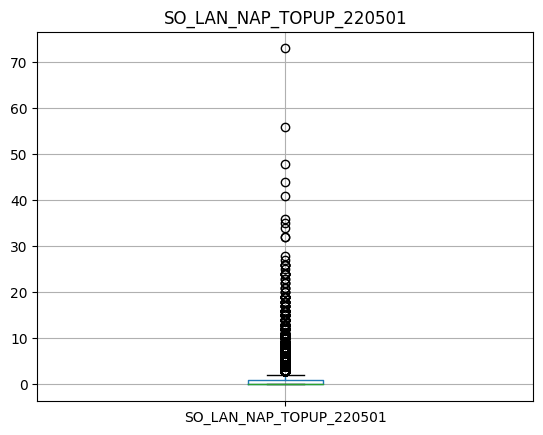

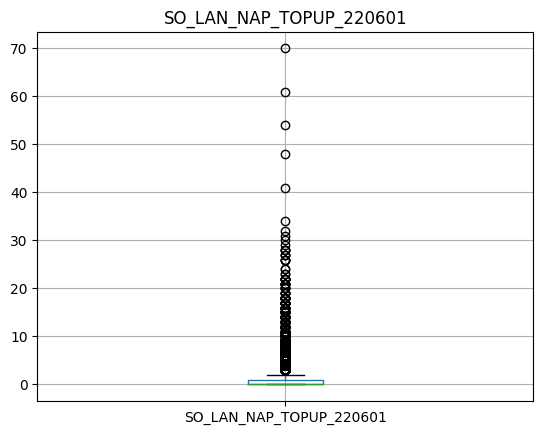

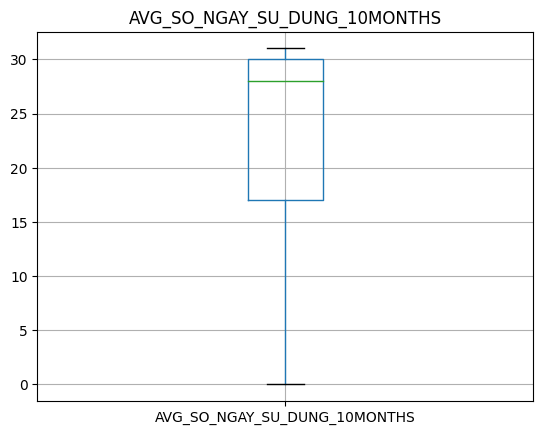

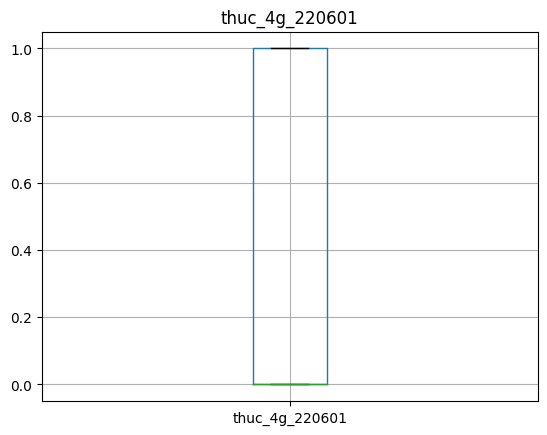

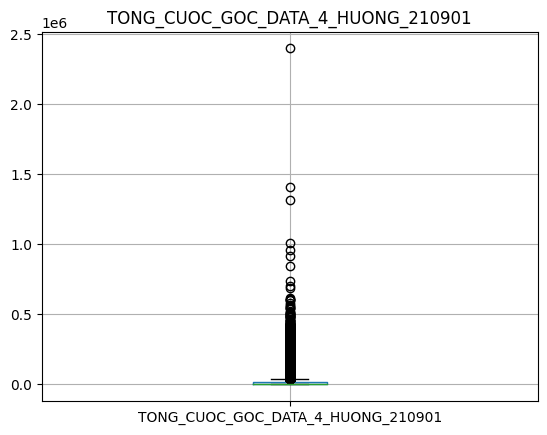

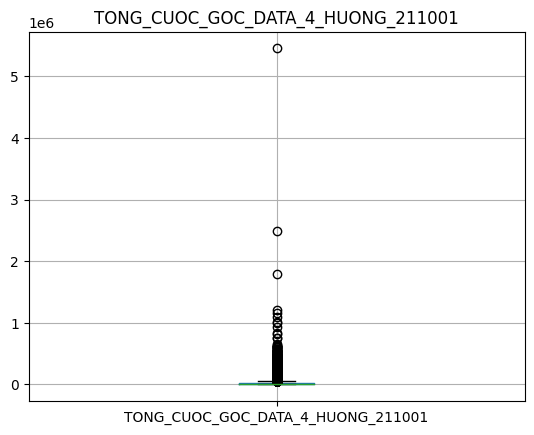

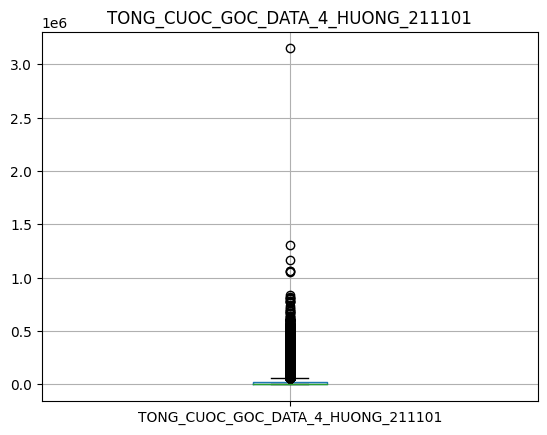

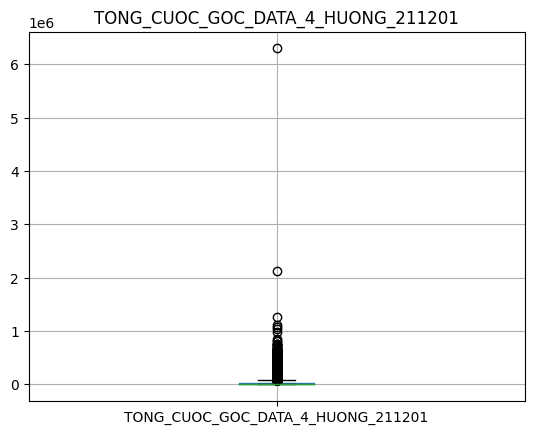

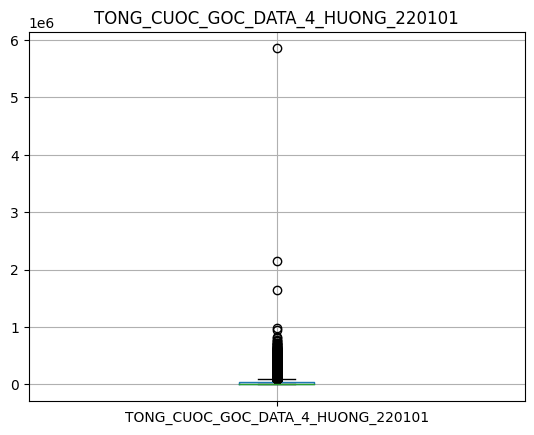

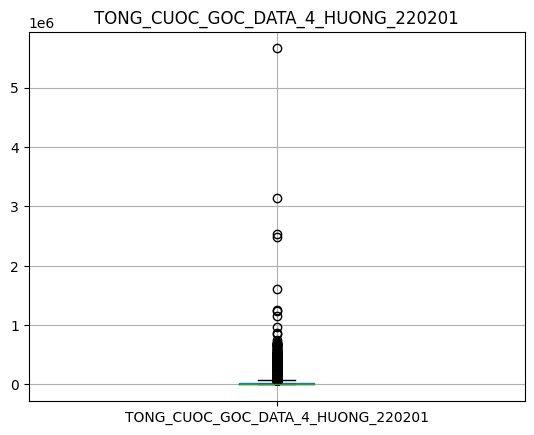

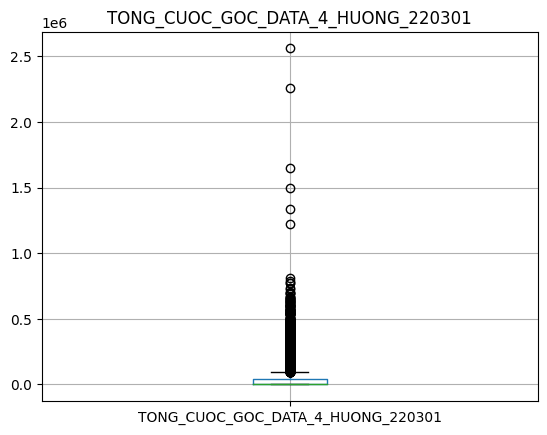

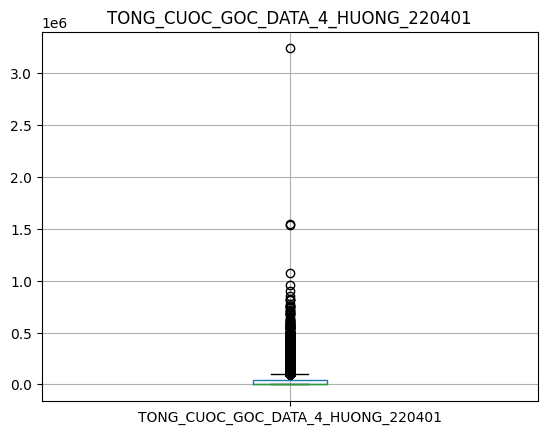

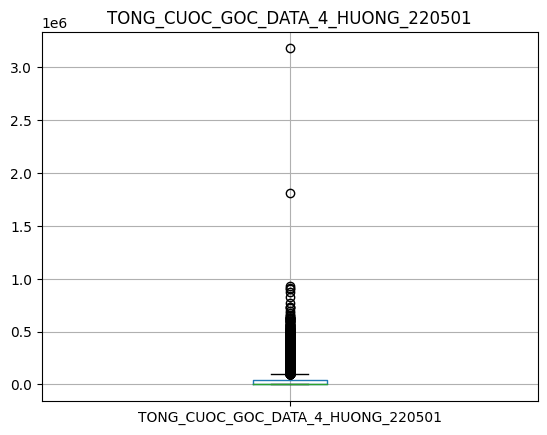

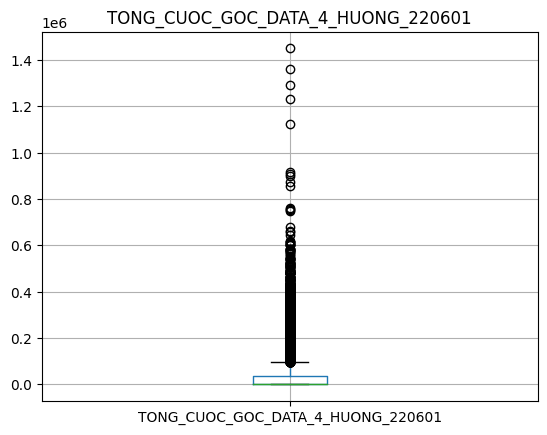

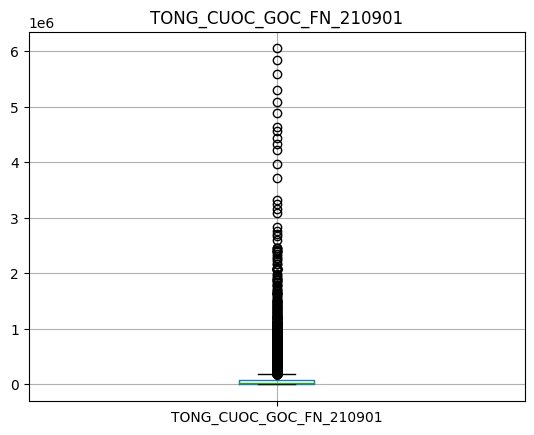

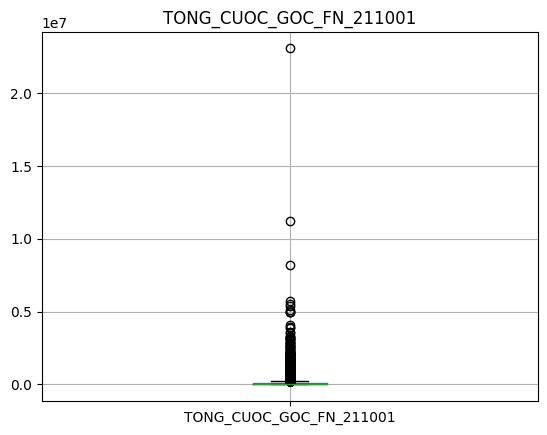

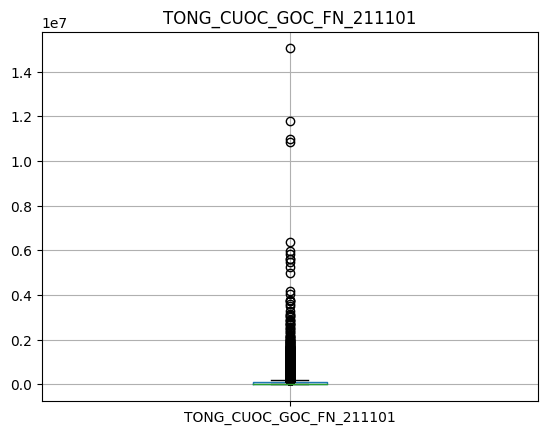

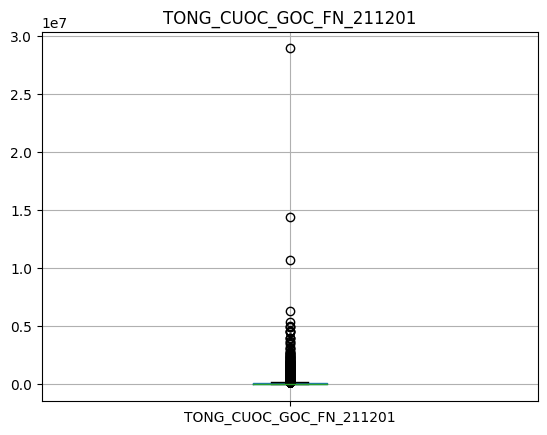

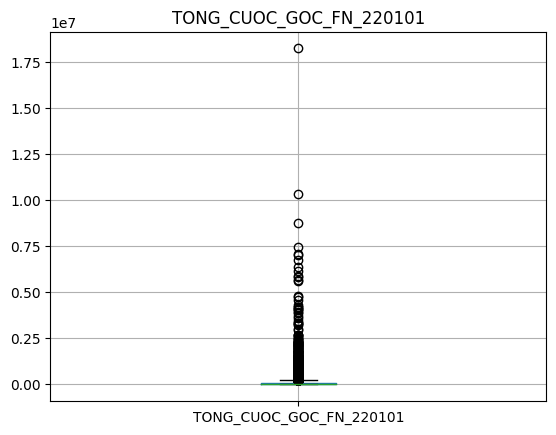

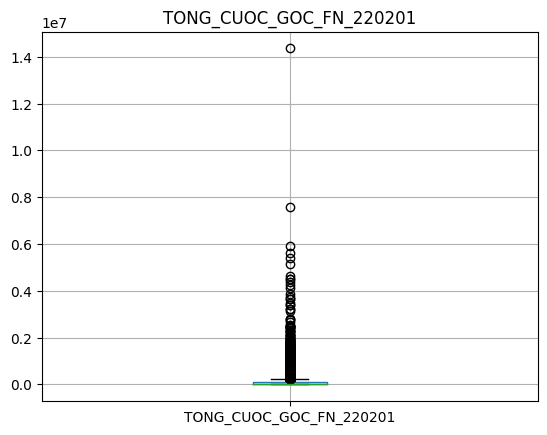

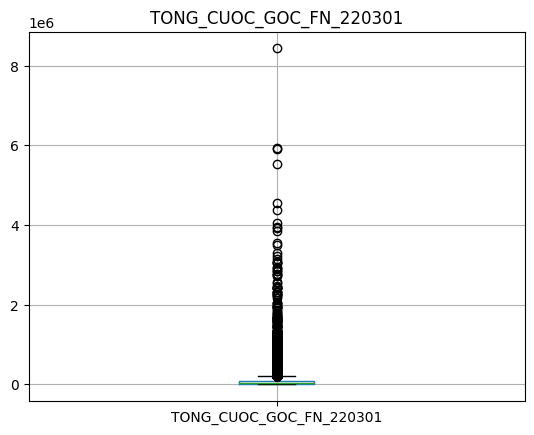

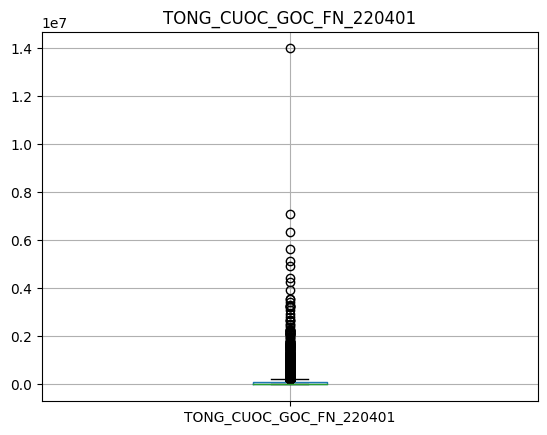

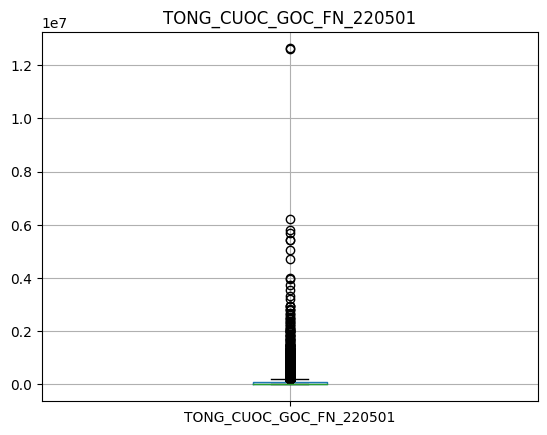

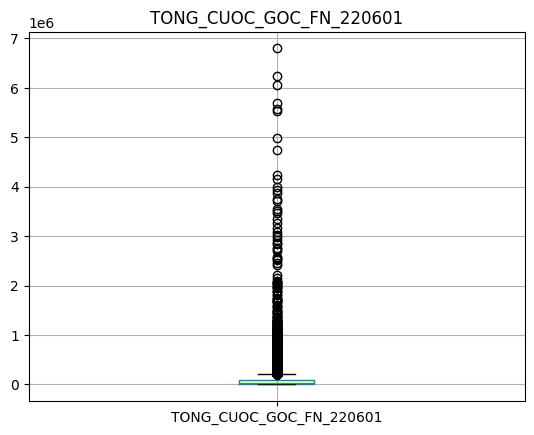

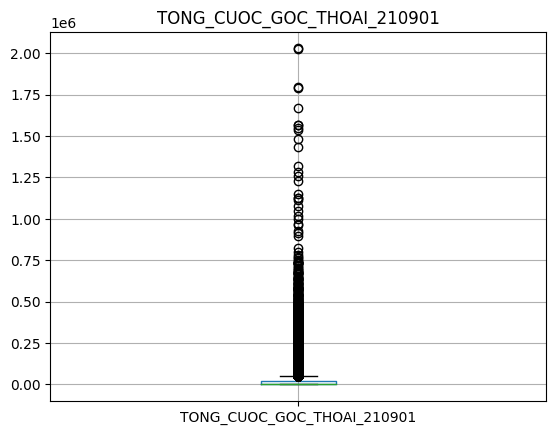

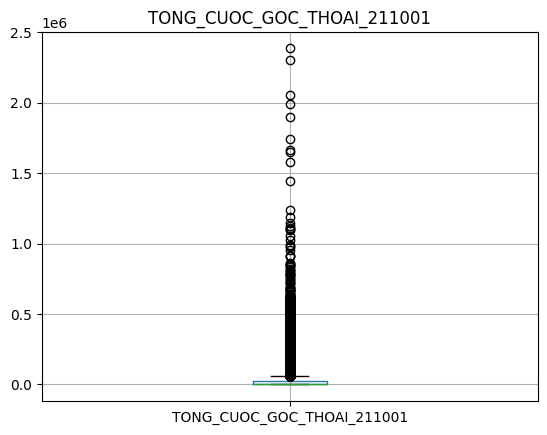

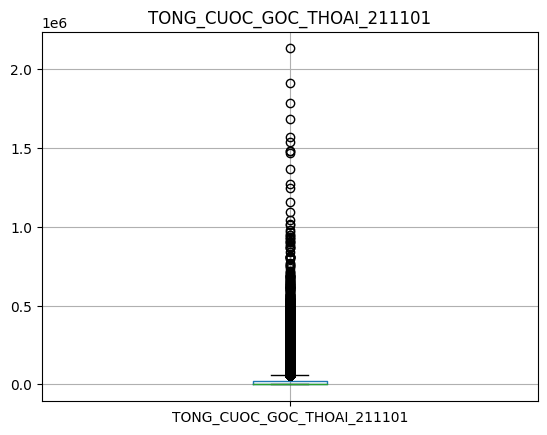

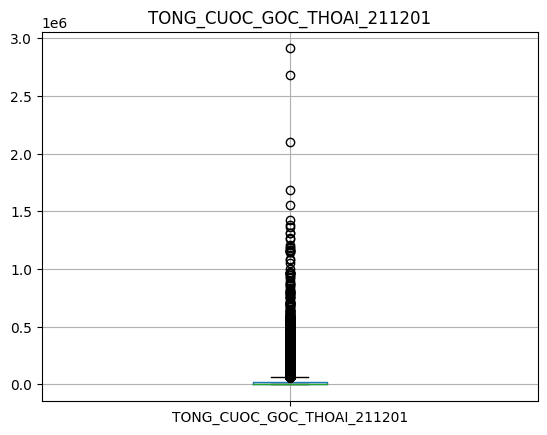

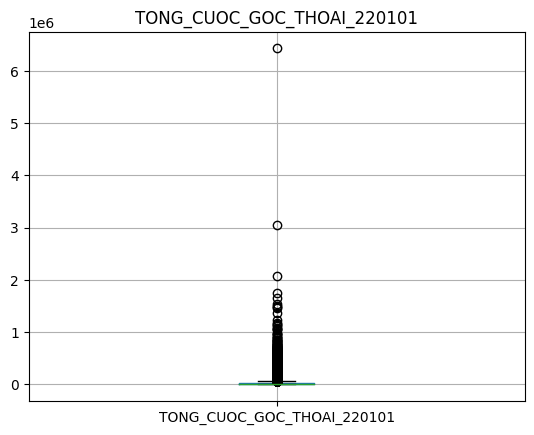

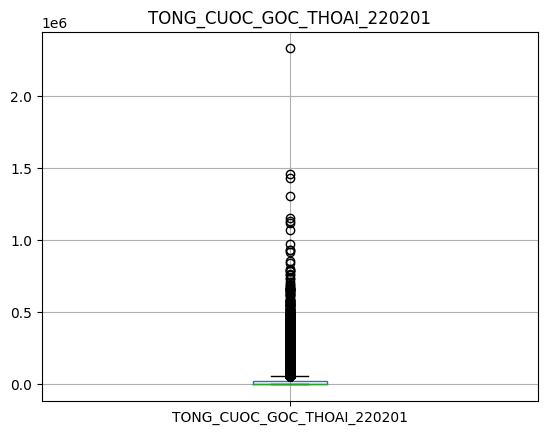

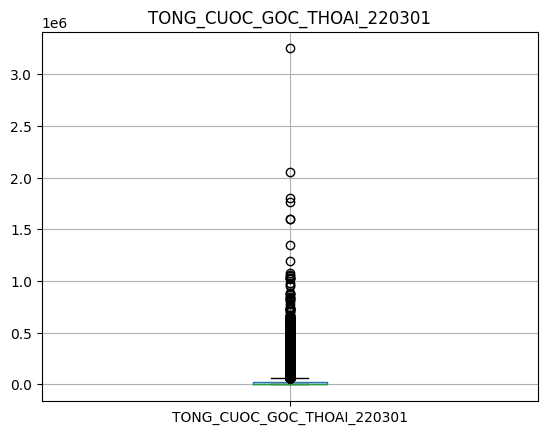

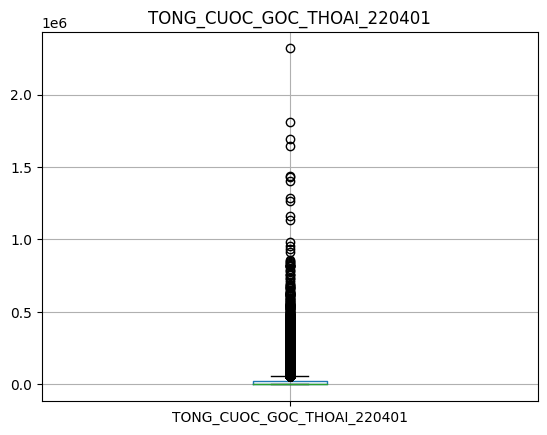

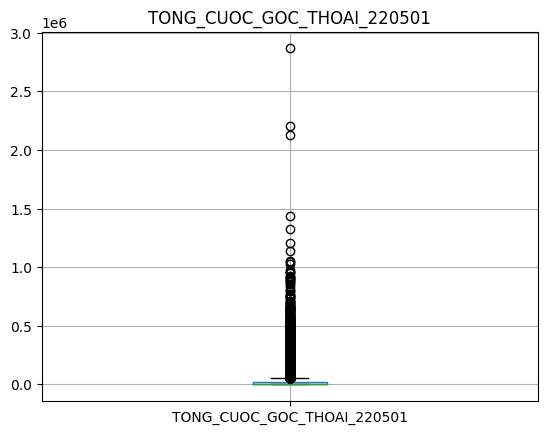

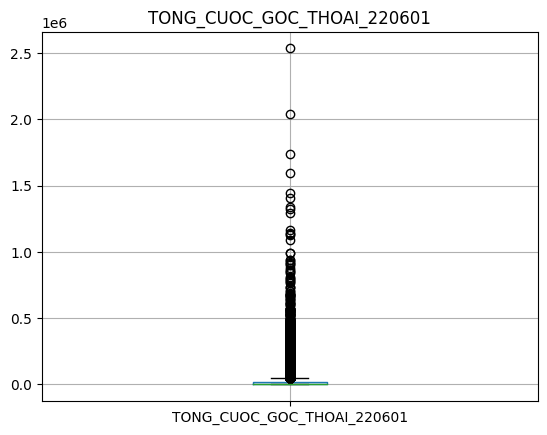

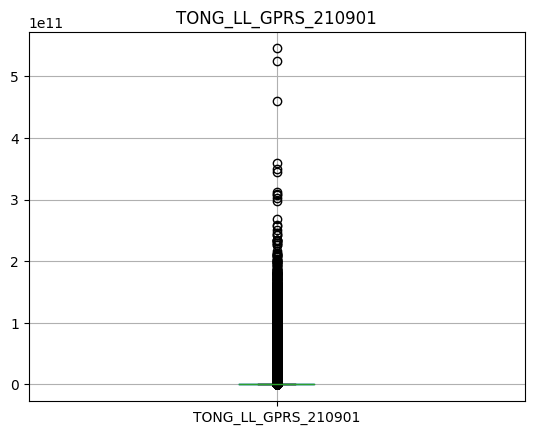

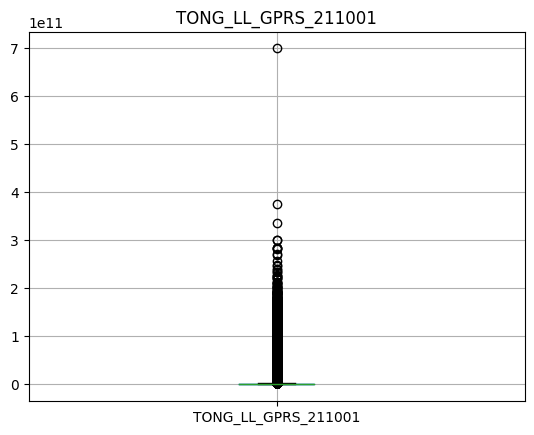

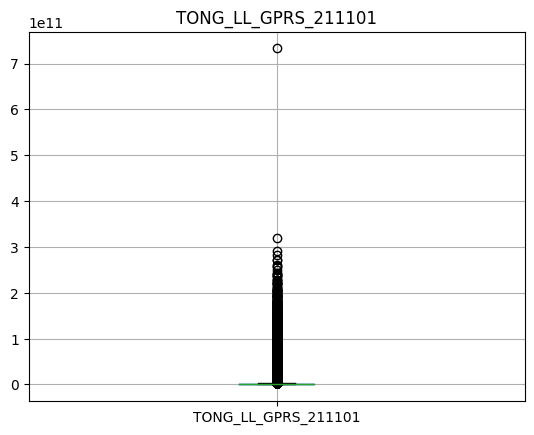

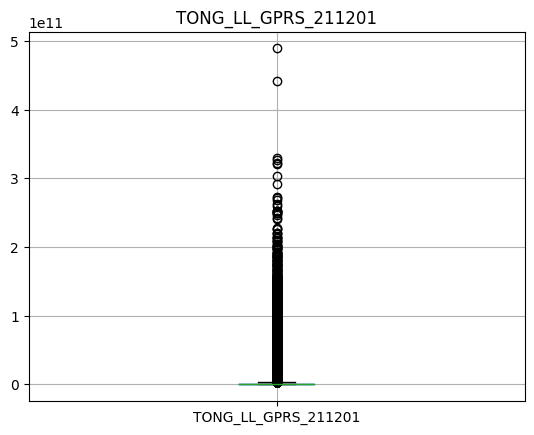

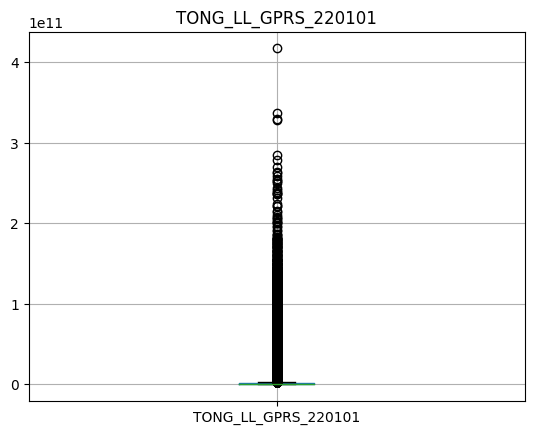

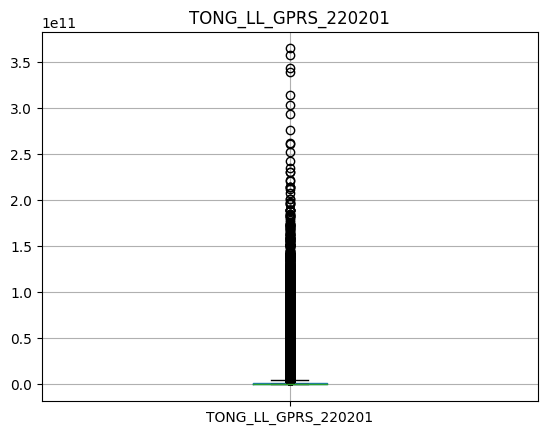

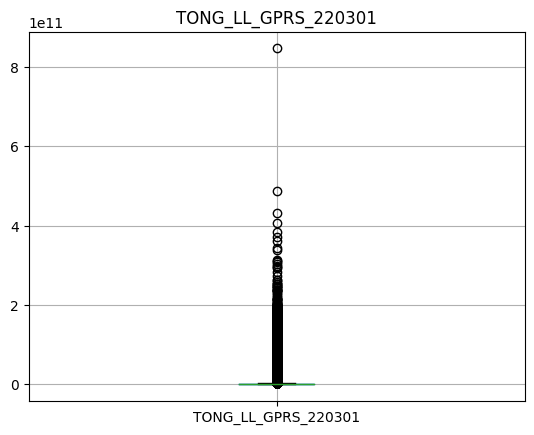

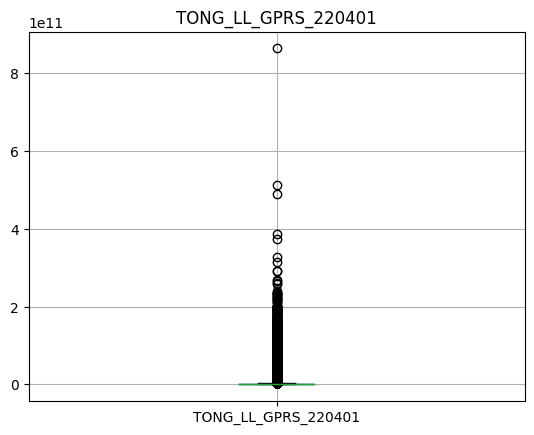

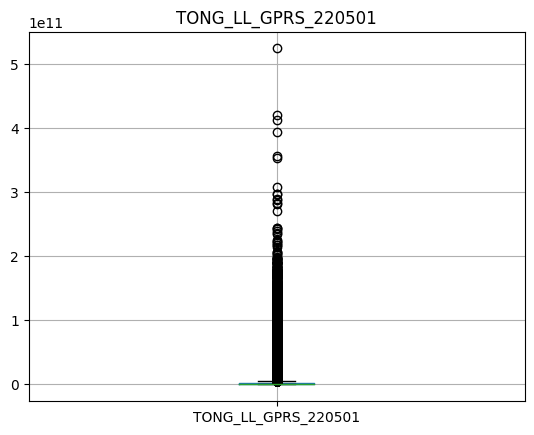

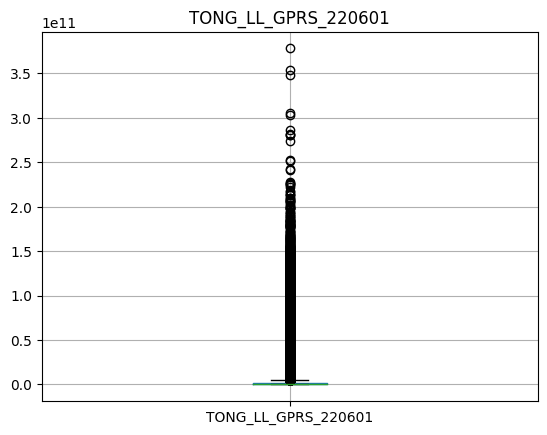

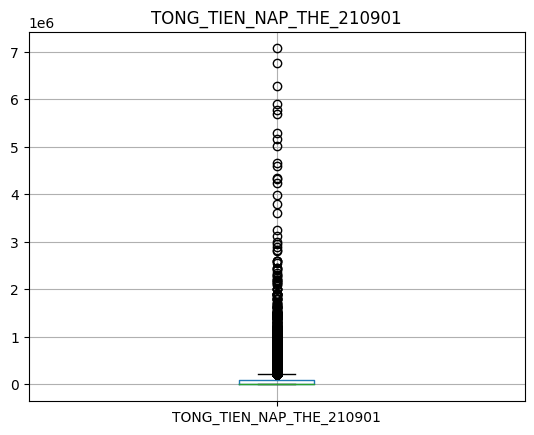

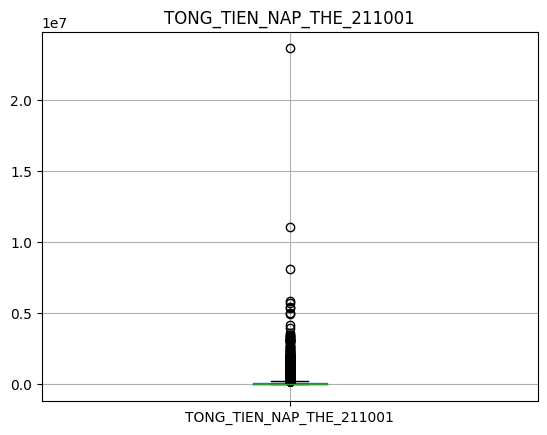

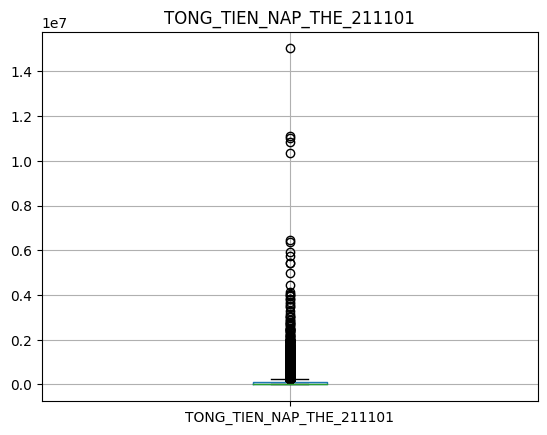

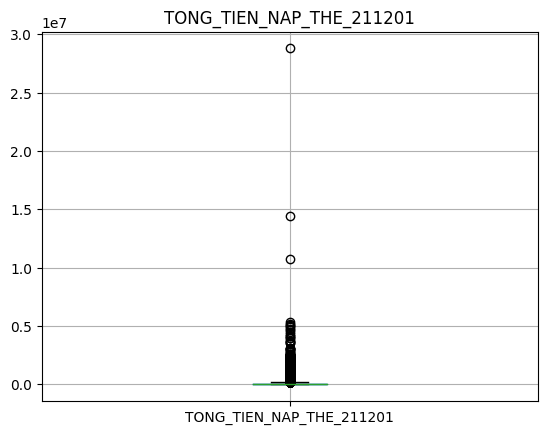

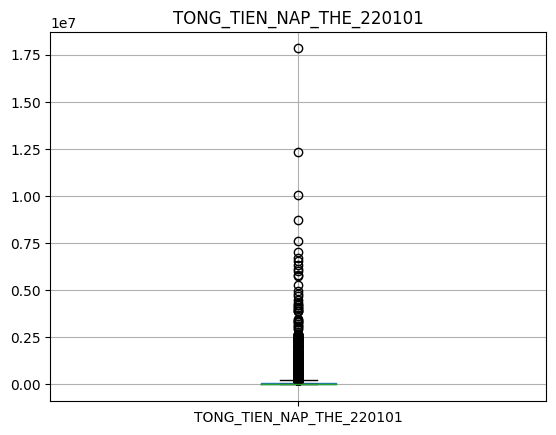

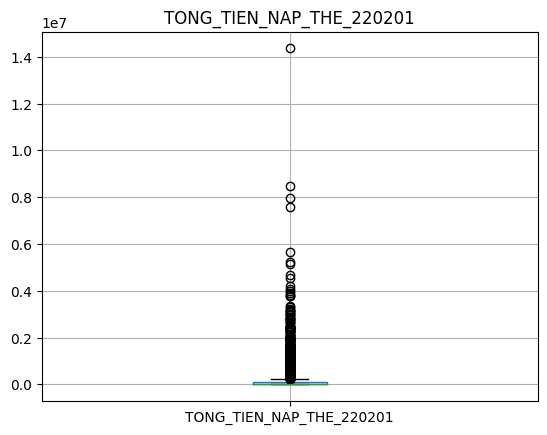

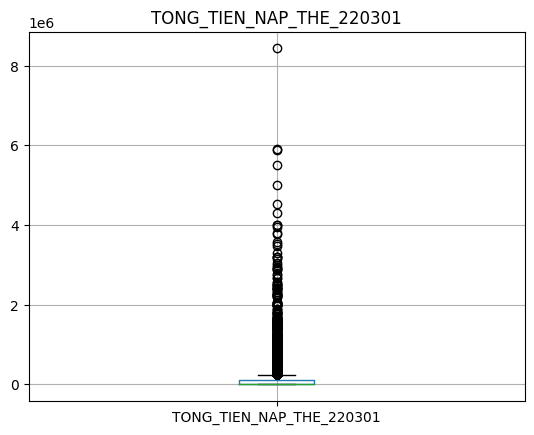

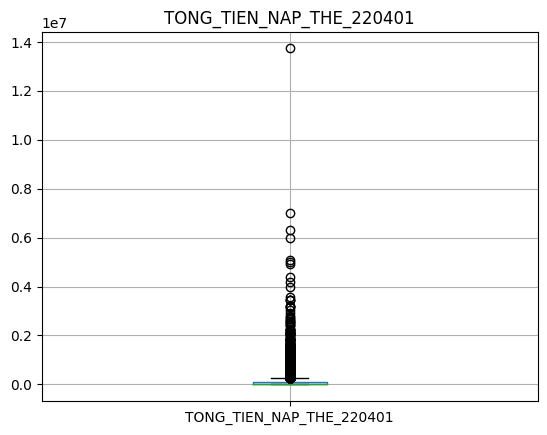

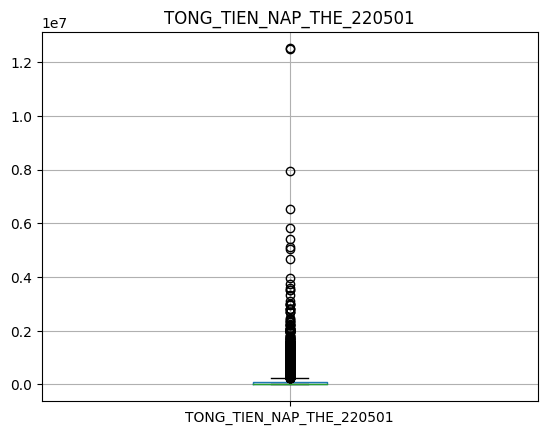

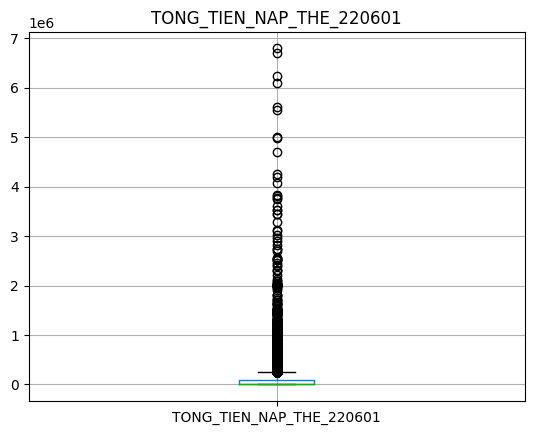

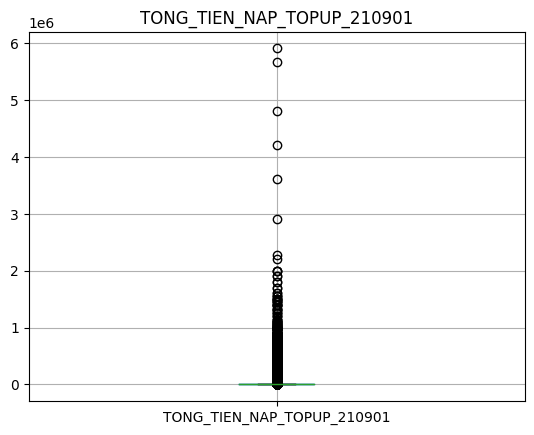

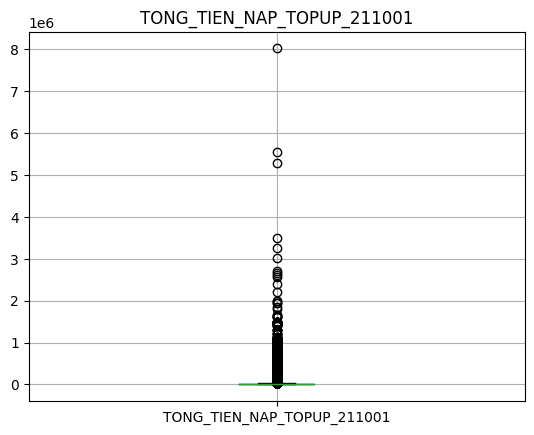

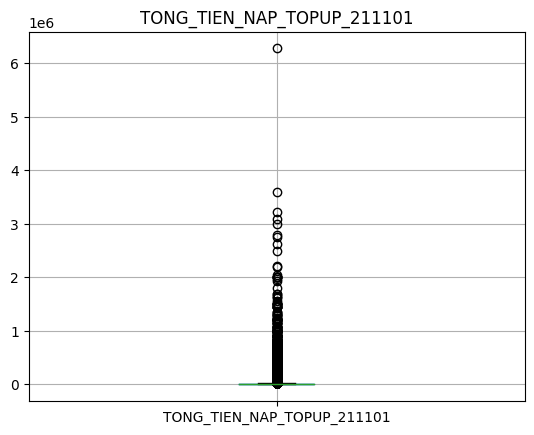

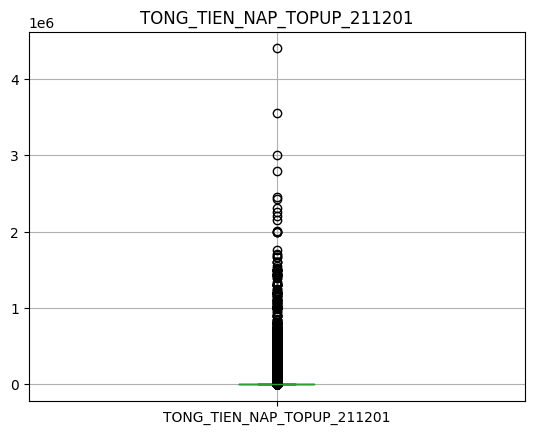

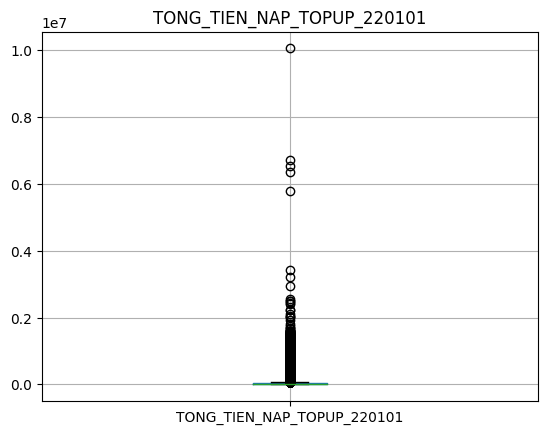

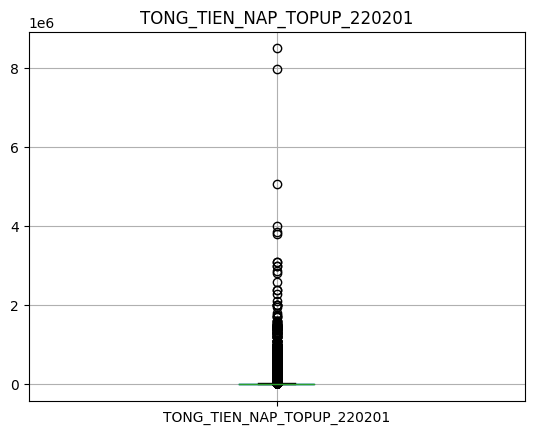

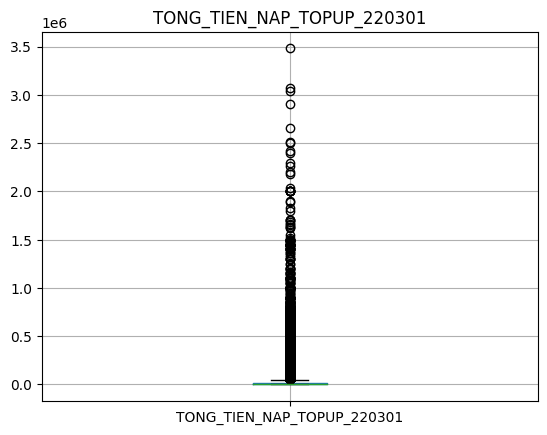

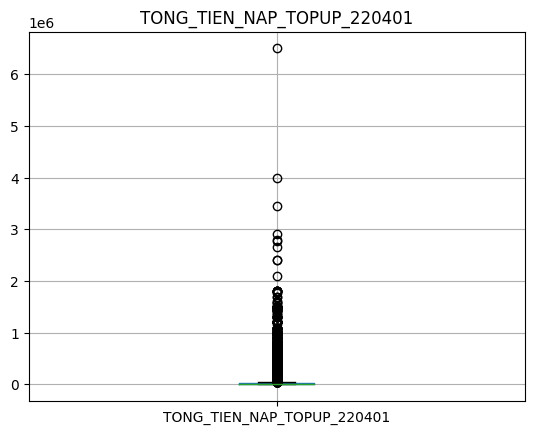

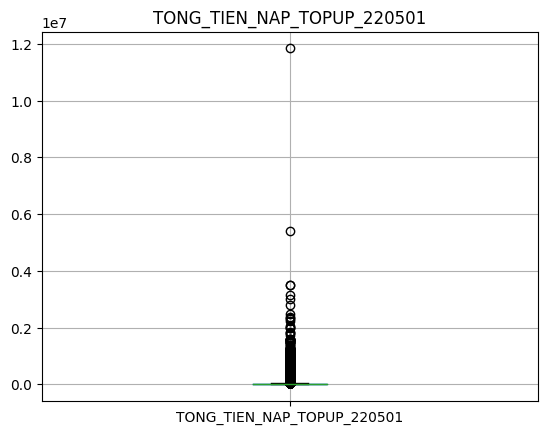

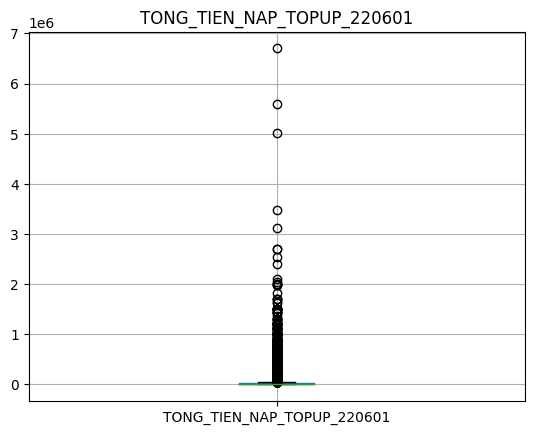

In [81]:
for col in numeric_cols:
  customer_data.boxplot(column=[col])
  plt.title(col)
  plt.show()

In [82]:
dataset = customer_data.copy()

In [83]:
dataset_dummy = pd.get_dummies(dataset, drop_first=True, dtype=int)
dataset_dummy

,SLG_CUOC_GOC_GPRS_10MONTHS,AVG_CUOC_GOC_GPRS_10MONTHS,IS_DCOM_220601,IS_SIM_4G_220601,LL_THOAI_210901,LL_THOAI_211001,LL_THOAI_211101,LL_THOAI_211201,LL_THOAI_220101,LL_THOAI_220201,...,THIET_BI_220601_5G,THIET_BI_220601_Unknown,TUOI_KHACH_HANG_cut_level_220601_15 < X <= 25,TUOI_KHACH_HANG_cut_level_220601_25 < X <= 35,TUOI_KHACH_HANG_cut_level_220601_35 < X <= 45,TUOI_KHACH_HANG_cut_level_220601_45 < X <= 55,TUOI_KHACH_HANG_cut_level_220601_55 < X <= 65,TUOI_KHACH_HANG_cut_level_220601_65 < X <= 75,TUOI_KHACH_HANG_cut_level_220601_75 < X,TUOI_KHACH_HANG_cut_level_220601_X <= 0
0,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,1,1254.0,299.0,652.0,0.0,58.0,1711.0,...,0,0,0,0,0,0,0,0,0,0
4,1,570.0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
199996,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
199997,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
199998,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [84]:
# View correlation
corr = dataset_dummy.corr()
corr.style.background_gradient(cmap='coolwarm')

In [85]:
# Remove correlation columns (TONG_CUOC_GOC_FN_220601 có corr cao với TONG_TIEN_NAP_THE_220601)
dataset_dummy_drop_corr = dataset_dummy.drop(columns=["TONG_TIEN_NAP_THE_210901","TONG_TIEN_NAP_THE_211001","TONG_TIEN_NAP_THE_211101",	"TONG_TIEN_NAP_THE_211201",	"TONG_TIEN_NAP_THE_220101",	"TONG_TIEN_NAP_THE_220201",	"TONG_TIEN_NAP_THE_220301",	"TONG_TIEN_NAP_THE_220401",	"TONG_TIEN_NAP_THE_220501",	"TONG_TIEN_NAP_THE_220601"])

MODEL 01: LOGISTIC REGRESSION (UPSAMPLING = SMOTE, SCALE = MINMAX)

In [86]:
for col in dataset_dummy:
    print(f'{col}: {dataset_dummy[col].unique()}')

SLG_CUOC_GOC_GPRS_10MONTHS: [ 0  1  3  4  8  2  6 10  5  7  9]
AVG_CUOC_GOC_GPRS_10MONTHS: [    0.     570.      90.   ... 70956.    2108.16 58370.8 ]
IS_DCOM_220601: [-1  1  0  4  2  5]
IS_SIM_4G_220601: [0 1]
LL_THOAI_210901: [    0.  1254.    59. ... 25855. 10834. 32257.]
LL_THOAI_211001: [    0.   299.   797. ... 11304. 21019.  6560.]
LL_THOAI_211101: [    0.   652.   181. ... 14751. 20627. 16933.]
LL_THOAI_211201: [    0.   423.    36. ... 19834. 10183. 14840.]
LL_THOAI_220101: [    0.    58.   210. ...  6906. 23545.    nan]
LL_THOAI_220201: [    0.  1711.   225. ... 12894.  7300. 32259.]
LL_THOAI_220301: [0.0000e+00 1.4540e+03 3.7000e+01 ... 1.0408e+04 1.2673e+04 4.1764e+04]
LL_THOAI_220401: [    0.   116.   377. ...  9169.  7966. 15245.]
LL_THOAI_220501: [    0.  1803.  1013. ... 20241. 14933. 10397.]
LL_THOAI_220601: [    0  1516   207 ... 10350  8882 26264]
SLG_NOD_PSLL_THOAI_20MONTHS: [ 0 23 13 26 30 19  3  6 18 29 17 14 16 12  1 11  5 15 21 20  8  2  4 22
 10 25 24 27  7 28 

In [222]:
from imblearn.over_sampling import SMOTE, SVMSMOTE

In [236]:
for col in dataset_dummy:
    dataset_dummy[col].fillna(dataset_dummy[col].mean(), inplace=True)

for col in dataset_dummy:
    dataset_dummy[col].fillna(dataset_dummy[col].mode()[0], inplace=True)


In [239]:
#1: Define features (X) and target variable (y)
X = dataset_dummy.drop(columns="thuc_4g_220601")
y = dataset_dummy["thuc_4g_220601"]

#2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

#3: Upsampling = SMOTE
sm = SMOTE()
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

#4: Scale
scale_columns = ['SLG_CUOC_GOC_GPRS_10MONTHS', 'AVG_CUOC_GOC_GPRS_10MONTHS', 'IS_DCOM_220601','IS_SIM_4G_220601', 'LL_THOAI_210901','LL_THOAI_211001', 'LL_THOAI_211101', 'LL_THOAI_211201', 'LL_THOAI_220101', 'LL_THOAI_220201', 'LL_THOAI_220301', 'LL_THOAI_220401', 'LL_THOAI_220501', 'LL_THOAI_220601','SLG_NOD_PSLL_THOAI_20MONTHS', 'SO_LAN_NAP_THE_210901', 'SO_LAN_NAP_THE_211001', 'SO_LAN_NAP_THE_211101', 'SO_LAN_NAP_THE_211201', 'SO_LAN_NAP_THE_220101', 'SO_LAN_NAP_THE_220201', 'SO_LAN_NAP_THE_220301', 'SO_LAN_NAP_THE_220401', 'SO_LAN_NAP_THE_220501', 'SO_LAN_NAP_THE_220601','SO_LAN_NAP_TOPUP_210901', 'SO_LAN_NAP_TOPUP_211001', 'SO_LAN_NAP_TOPUP_211101', 'SO_LAN_NAP_TOPUP_211201', 'SO_LAN_NAP_TOPUP_220101', 'SO_LAN_NAP_TOPUP_220201', 'SO_LAN_NAP_TOPUP_220301', 'SO_LAN_NAP_TOPUP_220401', 'SO_LAN_NAP_TOPUP_220501', 'SO_LAN_NAP_TOPUP_220601', 'AVG_SO_NGAY_SU_DUNG_10MONTHS','TONG_CUOC_GOC_DATA_4_HUONG_210901', 'TONG_CUOC_GOC_DATA_4_HUONG_211001', 'TONG_CUOC_GOC_DATA_4_HUONG_211101', 'TONG_CUOC_GOC_DATA_4_HUONG_211201', 'TONG_CUOC_GOC_DATA_4_HUONG_220101', 'TONG_CUOC_GOC_DATA_4_HUONG_220201', 'TONG_CUOC_GOC_DATA_4_HUONG_220301', 'TONG_CUOC_GOC_DATA_4_HUONG_220401', 'TONG_CUOC_GOC_DATA_4_HUONG_220501', 'TONG_CUOC_GOC_DATA_4_HUONG_220601', 'TONG_CUOC_GOC_FN_210901', 'TONG_CUOC_GOC_FN_211001', 'TONG_CUOC_GOC_FN_211101', 'TONG_CUOC_GOC_FN_211201', 'TONG_CUOC_GOC_FN_220101', 'TONG_CUOC_GOC_FN_220201', 'TONG_CUOC_GOC_FN_220301', 'TONG_CUOC_GOC_FN_220401', 'TONG_CUOC_GOC_FN_220501', 'TONG_CUOC_GOC_FN_220601', 'TONG_CUOC_GOC_THOAI_210901', 'TONG_CUOC_GOC_THOAI_211001', 'TONG_CUOC_GOC_THOAI_211101', 'TONG_CUOC_GOC_THOAI_211201', 'TONG_CUOC_GOC_THOAI_220101', 'TONG_CUOC_GOC_THOAI_220201', 'TONG_CUOC_GOC_THOAI_220301', 'TONG_CUOC_GOC_THOAI_220401', 'TONG_CUOC_GOC_THOAI_220501', 'TONG_CUOC_GOC_THOAI_220601', 'TONG_LL_GPRS_210901', 'TONG_LL_GPRS_211001', 'TONG_LL_GPRS_211101', 'TONG_LL_GPRS_211201', 'TONG_LL_GPRS_220101', 'TONG_LL_GPRS_220201', 'TONG_LL_GPRS_220301', 'TONG_LL_GPRS_220401', 'TONG_LL_GPRS_220501', 'TONG_LL_GPRS_220601', 'TONG_TIEN_NAP_TOPUP_210901', 'TONG_TIEN_NAP_TOPUP_211001', 'TONG_TIEN_NAP_TOPUP_211101', 'TONG_TIEN_NAP_TOPUP_211201', 'TONG_TIEN_NAP_TOPUP_220101', 'TONG_TIEN_NAP_TOPUP_220201', 'TONG_TIEN_NAP_TOPUP_220301', 'TONG_TIEN_NAP_TOPUP_220401', 'TONG_TIEN_NAP_TOPUP_220501', 'TONG_TIEN_NAP_TOPUP_220601']
scaler = MinMaxScaler()
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.fit_transform(X_test[scale_columns])


#5: Initialize and train the Logistic Regression model
model_log = LogisticRegression() 
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

#6: Print the rerults
print(classification_report( y_test, y_pred))




              precision    recall  f1-score   support

           0       0.84      0.41      0.55     20327
           1       0.60      0.92      0.73     19673

    accuracy                           0.66     40000
   macro avg       0.72      0.67      0.64     40000
weighted avg       0.73      0.66      0.64     40000



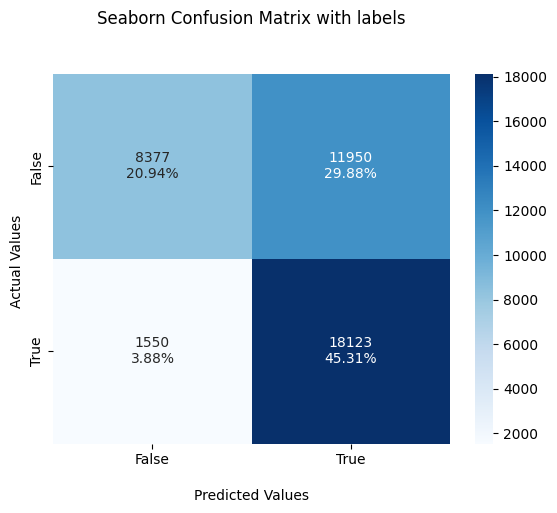

In [260]:
cm = confusion_matrix(y_test, y_pred)
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [143]:
X_train.shape, y_train.shape #160k bản ghi được dùng để train

((160000, 101), (160000,))

In [205]:
X.shape, y.shape #Tổng 200000 bản ghi--> Có 40k bản ghi sẽ được dùng để test

((200000, 101), (200000,))

In [144]:
y_train.value_counts()

thuc_4g_220601
0.0    80617
1.0    79383
Name: count, dtype: int64

MODEL 02: XGBOOST (NO SAMPLING, NO SCALE)

In [273]:
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_15 < X <= 25':'TUOI_KHACH_HANG_cut_level_220601_15_25'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_25 < X <= 35':'TUOI_KHACH_HANG_cut_level_220601_15_35'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_35 < X <= 45':'TUOI_KHACH_HANG_cut_level_220601_35_45'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_45 < X <= 55':'TUOI_KHACH_HANG_cut_level_220601_45_55'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_45 < X <= 55':'TUOI_KHACH_HANG_cut_level_220601_45_55'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_55 < X <= 65':'TUOI_KHACH_HANG_cut_level_220601_55_65'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_65 < X <= 75':'TUOI_KHACH_HANG_cut_level_220601_65_75'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_75 < X':'TUOI_KHACH_HANG_cut_level_220601_lonhon_70'}, inplace=True)
dataset_dummy.rename(columns={'TUOI_KHACH_HANG_cut_level_220601_X <= 0':'TUOI_KHACH_HANG_cut_level_220601_nhohon_0'}, inplace=True)

In [274]:
dataset_dummy

,SLG_CUOC_GOC_GPRS_10MONTHS,AVG_CUOC_GOC_GPRS_10MONTHS,IS_DCOM_220601,IS_SIM_4G_220601,LL_THOAI_210901,LL_THOAI_211001,LL_THOAI_211101,LL_THOAI_211201,LL_THOAI_220101,LL_THOAI_220201,...,THIET_BI_220601_5G,THIET_BI_220601_Unknown,TUOI_KHACH_HANG_cut_level_220601_15_25,TUOI_KHACH_HANG_cut_level_220601_15_35,TUOI_KHACH_HANG_cut_level_220601_35_45,TUOI_KHACH_HANG_cut_level_220601_45_55,TUOI_KHACH_HANG_cut_level_220601_55_65,TUOI_KHACH_HANG_cut_level_220601_65_75,TUOI_KHACH_HANG_cut_level_220601_lonhon_70,TUOI_KHACH_HANG_cut_level_220601_nhohon_0
0,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,1,1254.0,299.0,652.0,0.0,58.0,1711.0,...,0,0,0,0,0,0,0,0,0,0
4,1,570.0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
199996,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
199997,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
199998,0,0.0,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [275]:
# SMOTE & Scale
X = dataset_dummy_drop_corr.drop(["thuc_4g_220601"],axis=1)
y = dataset_dummy_drop_corr['thuc_4g_220601']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [277]:
# XGBoost

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
# In bao cao ket qua
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test) 


ValueError: feature_names must be string, and may not contain [, ] or <